## Titans or Shoestrings - Government Size 

Gapminder aggregates a number of datasets from various sources around the world, outlining basic statics about our lives. Government plays a large role in any person's life. How big a role should the government play? 

There's a constant battle about size of government amongst Canadian and American politics. A big government is often associated with a grey bureaucrat sitting behind a pane of safety glass laboriously applying stamps in triplicate while a line-up winds out on to the street. There are others who view an active and appropriately sized government as a necessary member of any wealthy society, that the institution is as much a bastion of civilization as the tenets of its politics. Unfortunately, neither narrative gives an obvious answer to the question. 

Is there a better way to answer the question than more politics? Can some perspective give us some help here? 

Defining governmental success is monumentally difficult, but we can start investigatin some initial trends and ideas. A government does a lot of things and you can measure it a lot of ways, but if we were going out to the store to shop for a government, what would be the basic items we'd look for? 

Let's start with one of the core premises that any state gives its people - You'll live long, happy, secure lives with us. Oh, and you'll pay taxes. Lots of taxes. 

Taxes and life expectancy are any easy number to assess and record, but how do you quantify happiness, security? For the purposes of this investigation, I'm going to assume that we can answer those questions by "at least I'm not poor". Poverty represents a large indicator for insecurity and unhappiness, and is also relatively quantifiable. 

### Indicators

Initially, we will review four indicators: 
* Tax revenue, as a % of GDP 
* GDP per capita (US$, inflation adjusted)
* Poverty, as compared to nationally defined lines 
* Life expectancy

These indicators represent the size of government, general economic efficacy of the people there, their livelihood, and how long they can expect to enjoy that livelihood. These aren't perfect indicators, but they're a start. 

### Scope of Investigation

This investigation will be limited to simple statistics and graphics, for the purposes of exercise. 

### Where's all this data coming from?
Gapminders (https://www.gapminder.org/data/). Data was taken from their newer database, and at the time of this project, extends up to 2017/2018 depending on the data set. 


* *Life Expectancy*, https://www.gapminder.org/data/documentation/gd004/
* *Tax Revenue*, https://data.worldbank.org/indicator/GC.TAX.TOTL.GD.ZS [Appears to be broken? Dig in later]
* *GDP per capita*, https://data.worldbank.org/indicator/NY.GDP.PCAP.KD [Appears to be broken? Dig in later]
* *Poverty, against national average*, http://go.worldbank.org/B53SONGPA0 [Also broken?] 



In [29]:
#usual imports and data grab
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
from country_plot import country_plot

%matplotlib inline

df_life = pd.read_csv('data/life_expectancy_years.csv') #life expectancy data set
df_gdp = pd.read_csv('data/gdppercapita_us_inflation_adjusted.csv') #GDP per capita, in US$, inflation adjusted
df_tax = pd.read_csv('data/tax_revenue_percent_of_gdp.csv') # Tax revenue as a % of GDP 
df_pov = pd.read_csv('data/alternative_poverty_percent_below_nationally_defined_poverty.csv') # % of people living below national poverty lines

Let's see if we need to do any data cleaning for each data set. 

In [30]:
df_life.head(3), df_life.shape, df_life.dtypes.unique() #checking roughly how the data looks, its overall size and layout

(           geo  1800  1801  1802  1803  1804  1805  1806  1807  1808  ...   \
 0  Afghanistan  28.2  28.2  28.2  28.2  28.2  28.2  28.1  28.1  28.1  ...    
 1      Albania  35.4  35.4  35.4  35.4  35.4  35.4  35.4  35.4  35.4  ...    
 2      Algeria  28.8  28.8  28.8  28.8  28.8  28.8  28.8  28.8  28.8  ...    
 
    2009  2010  2011  2012  2013  2014  2015  2016  2017  2018  
 0  55.7  56.2  56.7  57.2  57.7  57.8  57.9  58.0  58.4  58.7  
 1  75.9  76.3  76.7  77.0  77.2  77.4  77.6  77.7  77.9  78.0  
 2  76.3  76.5  76.7  76.8  77.0  77.1  77.3  77.4  77.6  77.9  
 
 [3 rows x 220 columns],
 (187, 220),
 array([dtype('O'), dtype('float64')], dtype=object))

Our dataset consists of 219 years of data, over 187 countries.  Are we missing any data? 

In [31]:
df_life.isnull().sum().sum() #checking how many missing values, in total, there are

516

Looks like we're missing about 516 datapoints.  Let's look at what we're missing.

In [32]:
df_life[df_life.isnull().any(axis=1)]

geo  1800  1801  1802  1803  1804  1805  1806  1807  1808  \
3             Andorra   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
48           Dominica   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
105  Marshall Islands   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

     ...   2009  2010  2011  2012  2013  2014  2015  2016  2017  2018  
3    ...   82.7  82.7  82.6  82.6  82.6  82.6  82.5  82.5   NaN   NaN  
48   ...   73.4  73.0  73.0  72.9  72.7  72.7  71.7  73.0   NaN   NaN  
105  ...   63.5  63.7  63.9  64.1  64.3  64.5  64.7  65.0   NaN   NaN  

[3 rows x 220 columns]

Looks like we're missing some years of data from three countries. Not much to worry about here, so let's continue. 

In [33]:
df_gdp.head(3), df_gdp.shape, df_gdp.dtypes.unique(), df_gdp.isnull().sum().sum() #checking roughly how the data looks, its overall size and layout

(           geo    1960    1961    1962    1963    1964    1965    1966  \
 0  Afghanistan     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
 1      Albania     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
 2      Algeria  2470.0  2080.0  1630.0  2130.0  2200.0  2280.0  2110.0   
 
      1967    1968   ...      2008    2009  2010    2011    2012    2013  \
 0     NaN     NaN   ...     445.0   525.0   553   569.0   630.0   634.0   
 1     NaN     NaN   ...    3780.0  3930.0  4090  4210.0  4280.0  4330.0   
 2  2240.0  2410.0   ...    4390.0  4390.0  4460  4500.0  4560.0  4600.0   
 
      2014    2015    2016    2017  
 0   630.0   620.0   618.0   618.0  
 1  4410.0  4520.0  4680.0  4870.0  
 2  4680.0  4760.0  4830.0  4830.0  
 
 [3 rows x 59 columns],
 (190, 59),
 array([dtype('O'), dtype('float64'), dtype('int64')], dtype=object),
 2484)

Some more obvious missing data here. This isn't particularly surprising, given the fact some of these nations wouldn't exist as they do now.

There are some issues with datatype incongruency in this dataset, which I'd like to look at more carefully to see if it'll cause us any problems. It looks like it's just a difference between integers and floats, whcih

In [34]:
df_gdp.select_dtypes(include ='int64').nunique() #checking where our weird data is

2010    180
dtype: int64

In [35]:
df_gdp['2010'] =df_gdp['2010'].astype('float64'); #reassigning datatypes
df_gdp.dtypes.unique()

array([dtype('O'), dtype('float64')], dtype=object)

On to the next set. 



In [36]:
df_tax.head(3), df_tax.shape, df_tax.dtypes.unique(), df_tax.isnull().sum().sum() #checking roughly how the data looks, its overall size and layout

(           geo  1972  1973  1974  1975  1976  1977  1978  1979  1980  ...   \
 0  Afghanistan   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    
 1      Albania   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    
 2      Algeria   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    
 
     2008   2009   2010   2011   2012   2013   2014   2015  2016  2017  
 0   6.04   8.44   9.12   8.85   7.47   7.08   6.84   7.55   NaN   NaN  
 1    NaN    NaN    NaN  18.00  17.50  16.50  18.30  18.50  17.6   NaN  
 2  45.30  35.10  34.40  37.20    NaN    NaN    NaN    NaN   NaN   NaN  
 
 [3 rows x 47 columns],
 (161, 47),
 array([dtype('O'), dtype('float64')], dtype=object),
 3523)

In [37]:
df_pov.head(3), df_pov.shape, df_pov.dtypes.unique(), df_pov.isnull().sum().sum()#checking roughly how the data looks, its overall size and layout

(           geo  1985  1986  1987  1988  1989  1990  1991  1992  1993  ...   \
 0  Afghanistan   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    
 1      Albania   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    
 2      Algeria   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    
 
    2008  2009  2010  2011  2012  2013  2014  2015  2016  2017  
 0   NaN   NaN   NaN  35.8   NaN   NaN   NaN   NaN   NaN   NaN  
 1  12.4   NaN   NaN   NaN  14.3   NaN   NaN   NaN   NaN   NaN  
 2   NaN   NaN   NaN   5.5   NaN   NaN   NaN   NaN   NaN   NaN  
 
 [3 rows x 34 columns],
 (135, 34),
 array([dtype('O'), dtype('float64')], dtype=object),
 3682)

More missing data, but our datatypes look OK. 

As shown above, after cleaning, we're still missing a lot data from a number of countries. While there are avenues for cleaning data statistically, judging by the nature of the missing data, it would be unwise to handle these as anything other than null values for the time being.

Each dataset also appears to be missing countries - 161 rows here, 135 rows there - suggesting that our ability to cross-examine certain countries will be limited. This seems like a logical next step - let's mash all of this data together and cut out anything not useful. 

Fortunately, all of our data is laid out in basically the same way. unfortunately, if we're going to mash it all together, then I'll want to append each yearly column with something unique. I'm also going to move the index over to the first column, to aid in later merging.

In [38]:
list_df = [df_life, df_gdp, df_tax, df_pov]

In [39]:
for i in list_df:      #setting index to be geo column
    i.set_index('geo',inplace=True) 

There's no real point in displaying data that I don't have. As tax revenue is the item I want to show the most for, I should be using that as my limiting point for analysis. 

Time to set up some nicer looking plots, and test them against my country, and another country that's represented in all of the datasets. But let's get the mapping side of it sorted out first. 

In [40]:
df_tax.columns #checking what the earliest column is

Index(['1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980',
       '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017'],
      dtype='object')

As our tax data only goes back to 1972, let's trim the rest of our datasets to start there for ease of graphing. I will be messing with the means for each country for those data sets, but I'm only really interested in the current comparison. So lets drop them.

In [41]:
y = '1972' #search date

#drop columns not included in the tax data (if possible)
for frame in list_df:
    if y in frame.columns.tolist():
        a = frame.columns.tolist()
        del a[a.index(y):len(a)]
        frame.drop(a,axis=1,inplace = True)
        print(frame.columns[0])
 


1972
1972
1972


Now that we've collated our data in to something meaningful, we need to deal with the differences in scales. The magnitude of each value is less important than its relative increase compared to its average value. This goes for life expectancy and GDP/Capita values. 

In [42]:
df_gdp.mean(axis=1)

geo
Afghanistan                         510.937500
Albania                            2768.947368
Algeria                            3791.086957
Andorra                           39984.782609
Angola                             2428.421053
Antigua and Barbuda               10379.512195
Argentina                          8168.478261
Armenia                            2376.821429
Australia                         39991.304348
Austria                           36667.391304
Azerbaijan                         3505.714286
Bahamas                           27139.130435
Bahrain                           20710.526316
Bangladesh                          525.543478
Barbados                          14115.909091
Belarus                            4195.357143
Belgium                           35252.173913
Belize                             3189.565217
Benin                               669.565217
Bhutan                             1334.605263
Bolivia                            1688.260870
Bosnia an

In [43]:
#attempts at iterating through my list of dataframes - need to dig in to this more to figure out why dataframes aren't iterating

# list_df = [[frame.apply(lambda x: (x-x.min()) / (x.max()-x.min()))] for frame in list_df]
#for frame in list_df:
   # frame = frame.apply(lambda x: (x-x.min()) / (x.max()-x.min()))

Let's normalize all of our data. Our poverty dataframe is already a percentage, and doesn't need the same adjustment. It does need to be converted. 

In [44]:
df_gdp = df_gdp.apply(lambda x: (x-x.min()) / (x.max()-x.min()))


In [45]:
df_life = df_life.apply(lambda x: (x-x.min()) / (x.max()-x.min()))

In [46]:
df_tax = df_tax.apply(lambda x: (x-x.min()) / (x.max()-x.min()))

In [47]:
df_pov = df_pov.apply(lambda x: x/100)

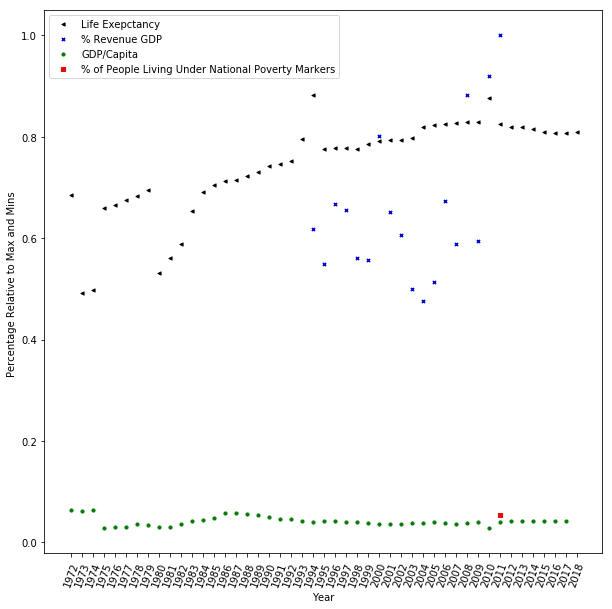

In [49]:
#setting up a plot for a dataset 
country = 'Algeria'

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)

ax1.scatter(df_life.columns.tolist(),df_life.loc[country],s=10, c='k', marker="<", label = 'Life Exepctancy')
ax1.scatter(df_tax.columns.tolist(),df_tax.loc[country],s=10, c='b',marker ="x", label = '% Revenue GDP')
ax1.scatter(df_gdp.columns.tolist(), df_gdp.loc[country],s=10, c='g', marker="o", label = 'GDP/Capita')
ax1.scatter(df_pov.columns.tolist(), df_pov.loc[country],s=10, c='r', marker=",", label = '% of People Living Under National Poverty Markers')

plt.xticks(rotation=70)
plt.xlabel('Year')
plt.ylabel('Percentage Relative to Max and Mins ')

plt.legend(loc='best');
plt.show()

Let's step back for a moment and try and determine what I really want to see here. 

I'f I'm going to be comparing tax revenues as a percentage of GDP against the other markers that I picked, then I want to make a series of graphs comparing each set for a bunch of different countries. Doing them for specific countries seems interesting, but perhaps not big enough. 

How about I consider splitting them in to quartiles? I'm not particularly ocncerned about outliers at this point - if someone is doing particularly well in this front, then it's probably worth looking at. If I compare them all by their quartiles, then I should be able to make some headway. 

In [21]:
df_gdp.mean()

1972     7312.870370
1973     7659.564815
1974     8204.618182
1975     8873.061404
1976     9192.086957
1977     9156.416667
1978     9182.475000
1979     9519.776860
1980     9551.810606
1981     9199.955882
1982     8911.507246
1983     8863.289855
1984     8939.385714
1985     8954.765957
1986     8858.895833
1987     8846.292517
1988     8991.275168
1989     9208.533333
1990     9080.521739
1991     9087.567901
1992     9045.420732
1993     9014.333333
1994     9100.167665
1995     9347.340909
1996     9632.724719
1997    10199.194444
1998    10431.555556
1999    10668.408840
2000    11249.467391
2001    11321.864865
2002    11399.263441
2003    11611.688172
2004    12029.118280
2005    12322.209677
2006    12745.360215
2007    13085.122995
2008    13096.508021
2009    12494.850267
2010    13966.078947
2011    12787.668449
2012    12904.198925
2013    12987.623656
2014    13155.446237
2015    13380.529730
2016    13579.945652
2017    13861.781421
dtype: float64